# Algoritmos de validación

#### Cuando entrenamos un algoritmo de *clasificación* (o *regresión*), nos interesa que esté listo para aplicarse a los <font color='orange'> datos desconocidos</font>, y estimar así su valor de salida.

####Pero, si entrenamos con cierto conjunto de datos $X$, y luego "medimos" el rendimiento del clasificador al estimar la clase de los mismos datos $X$, no podremos saber cómo se comporta ante patrones o situaciones desconocidas.

####Aquí es donde los **`algoritmos de validación`** entran en juego.

####Primero, ¿cómo podemos saber cómo se comporta un clasificador ante patrones desconocidos? ¡Probándolo!

####La forma más fácil de hacerlo entonces es: **dividiendo los datos**, i.e., dejando una parte de ellos para entrenar el algoritmo (<font color='DeepSkyBlue'>train</font>) y la otra (<font color='DarkViolet'>test</font>) para probar su desempeño.
####A esto se le conoce como "hold-out".

## Hold-out
####Es común (pero no es una regla) que en el hold-out se divida el conjunto de datos en entrenamiento y prueba en proporciones <font color='DeepSkyBlue'>$70\text{%}$</font> / <font color='Coral'>$30\text{%}$</font>, o bien <font color='DeepSkyBlue'>$\frac{2}{3}$</font> / <font color='Coral'>$\frac{1}{3}$</font>. 

<center><img src="https://i.postimg.cc/d1b2Dv0g/Holdout.jpg" alt="Holdout" width="75%">
<br><b>Figura 1.</b> Hold-out<br>
</center>

####Hold-out es la forma más simple de dividir los datos y la menos costosa computacionalmente hablando. Sin embargo, tiene la desventaja que no refleja de buena manera la distribución de los datos.

Matplotlib is building the font cache; this may take a moment.


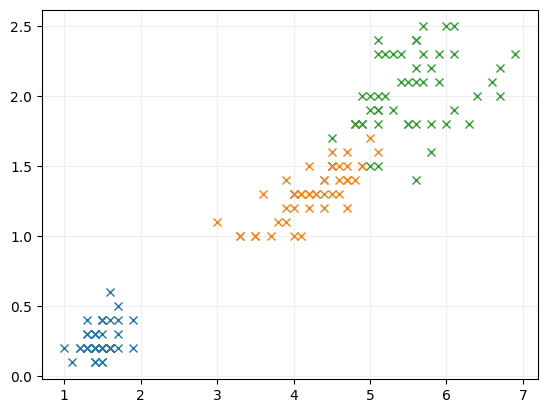

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

plt.plot(X[0:50,0],X[0:50,1],'x')
plt.plot(X[50:100,0],X[50:100,1],'x')
plt.plot(X[100:150,0],X[100:150,1],'x')
plt.grid(color='#eeeeee')
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=39) #try random_state=41
# print(X_train, y_train)
# print(X_test, y_test)

plt.plot(X_train[:,0],X_train[:,1],'x')
plt.plot(X_test[:,0],X_test[:,1],'x')
plt.grid(color='#EEEEEE')
plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42) #try random_state=41

# Genera el objeto del clasificador
clf = RandomForestClassifier()
# clf = KNeighborsClassifier(n_neighbors=1, metric='minkowski',p=2)

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Medir rendimiento
score = clf.score(X_test, y_test)

print(f'Desempeño del clasificador: {100*score}%')

## k-Fold cross-validation
####¿Qué tal si dividimos los datos de una forma **más creativa** para estimar mejor el desempeño de un clasificador o regresor?

####El método **k-Fold** de validación cruzada divide los datos en $k$ $\text{particiones}$ (comúnmente $10$ o $5$).

####Entonces itera $k$ veces de forma que en la **primera** vuelta, entrena con todos los datos <font color='OrangeRed'>excepto</font> con el **primer** fold, que es el que sirve como <font color='LimeGreen'>datos desconocidos</font> para estimar el desempeño del clasificador; para la **segunda** vuelta entrena con todos los datos <font color='OrangeRed'>excepto</font> por el **segundo** fold, que se usa para estimar el desempeño del clasificador.

####Lo mismo sucede para los demás folds, como puede verse en la Figura 2.

####Al final, el desempeño del clasificador se estima como el promedio de su desempeño en cada fold.

<center><img src="https://i.postimg.cc/L5jz17Y5/k-Fold.png" alt="k-Fold" width="75%">
<br><b>Figura 2.</b> k-Fold cross-validation<br>
</center>

####¿En cuántos **folds** se divide el ejemplo de la imagen? ¿Cuál sería el valor de $k$ para ese $k$-Fold?

####Algo importante del $k$-Fold es que **todos** los patrones fueron <font color='Coral'>desconocidos</font> para el algoritmo en algún momento. Es por esto último que se le llama validación cruzada (cross-validation).


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto en datos de entrenamiento y de prueba usando KFold
# kf = KFold(n_splits=10, shuffle=True)
# kf.get_n_splits(X)

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=90)
kf.get_n_splits(X,y)

for train_id, test_id in kf.split(X,y):
    # print("\nTRAIN:", train_id,"\nTEST:", test_id)
    X_train, X_test = X[train_id], X[test_id]
    y_train, y_test = y[train_id], y[test_id]

    plt.plot(X_train[:,0],X_train[:,1],'x')
    plt.plot(X_test[:,0],X_test[:,1],'x')
    plt.grid(color='#EEEEEE')
    plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto en datos de entrenamiento y de prueba usando KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(X)

# Inicializa el clasificador
clf = RandomForestClassifier()

# Crear una lista para almacenar los resultados de desempeño del
#   clasificador en cada fold
score = []

for train_id, test_id in kf.split(X):
    del(clf) #Cada fold genera un nuevo clasificador, por eso se borra aquí
    clf = RandomForestClassifier() #Lo volvemos a crear
    # clf = KNeighborsClassifier()
    X_train, X_test = X[train_id], X[test_id]
    y_train, y_test = y[train_id], y[test_id]

    # Entrenar el clasificador
    clf.fit(X_train, y_train)
    score_fold = clf.score(X_test, y_test)
    score.append(score_fold)

# Desempeño del clasificador en cada fold
score = np.array(score)
print(f'Desempeño del clasificador en cada fold:\n{np.round(100*score,2)}')

# Medir rendimiento final del clasificador
performance = np.mean(score)

print(f'\nDesempeño total del clasificador: {np.round(100*performance,2)}%')

## Leave-one-out cross-validation
####*Leave-one-out* es una forma <font color='DarkViolet'>extrema</font> de hacer el $k$-Fold, para el caso particular cuando $k=n$ siendo $n$ el <font color='DeepSkyBlue'>número de patrones</font> que tiene el conjunto de datos.

####Esto es, si se divide tantas veces como patrones haya, quiere decir que, al iterar, en la **primera** vuelta el clasificador se entrena con todos los patrones <font color='OrangeRed'>excepto</font> con el **primero**, que es el que sirve para <font color='LimeGreen'>estimar si el clasificador lo hizo bien</font>. Para la **segunda** vuelta, se entrena con todos los patrones <font color='OrangeRed'>excepto</font> con el **segundo**, que se usar para <font color='LimeGreen'>clasificar</font>

####De forma general para la $i-$ésima vuelta, se entrena con todos menos con el $i-$ésimo patrón, que es el que se clasifica.
####De este modo, el clasificador prueba cada patrón, siendo éste desconocido, ver Figura 3.
####Al final, el desempeño del clasificador se estima como el promedio de su desempeño en cada fold.


<center><img src="https://i.postimg.cc/05SGF6Wv/LOOCV.png" alt="LOOCV" width="75%">
<br><b>Figura 3.</b> Leave-one-out cross-validation<br>
</center>

####¿En cuántos folds se divide el ejemplo de la imagen?
####¿Hay alguna diferencia si elige modificar el orden de las particiones?


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto en datos de entrenamiento y de prueba usando KFold
kf = KFold(n_splits=len(X), shuffle=True)
kf.get_n_splits(X)

c=0
verbose=False

for train_id, test_id in kf.split(X):
    c+=1
    print("\nTRAIN:", train_id,"\nTEST:", test_id)
    # X_train, X_test = X[train_id], X[test_id]
    # y_train, y_test = y[train_id], y[test_id]

    if verbose:
      print(f'FOLD({c})')
      plt.plot(X_train[:,0],X_train[:,1],'x')
      plt.plot(X_test[:,0],X_test[:,1],'x')
      plt.grid(color='#EEEEEE')
      plt.show()

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importar los datos de iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]  # Tomamos sólo la tercera y cuarta columna
y = iris.target

# Separar el conjunto en datos de entrenamiento y de prueba usando KFold
kf = KFold(n_splits=len(X), shuffle=True, random_state=41)
kf.get_n_splits(X)

# Inicializa el clasificador
clf = RandomForestClassifier()

# Crear una lista para almacenar los resultados de desempeño del
#   clasificador en cada fold
score = []

for train_id, test_id in kf.split(X):
    del(clf) #Cada fold genera un nuevo clasificador, por eso se borra aquí
    # clf = RandomForestClassifier() #Lo volvemos a crear
    clf = KNeighborsClassifier()
    X_train, X_test = X[train_id], X[test_id]
    y_train, y_test = y[train_id], y[test_id]

    # Entrenar el clasificador
    clf.fit(X_train, y_train)
    score_fold = clf.score(X_test, y_test)
    score.append(score_fold)

# Desempeño del clasificador en cada fold
score = np.array(score)
print(f'Desempeño del clasificador en cada fold:\n{np.round(100*score,2)}')

# Medir rendimiento final del clasificador
performance = np.mean(score)

print(f'\nDesempeño total del clasificador: {np.round(100*performance,2)}%')

####¿Qué pueden apreciar del desempeño del clasificador en cada fold?



---



---



# Métricas de rendimiento en la clasificación
<br>

####Las **métricas de rendimiento** se refieren al cálculo de ciertos *valores* que nos permiten <font color='OrangeRed'>evaluar</font> el <font color='DarkOrchid'>rendimiento</font> de un algoritmo.



## Métricas de Clasificación
####En los algoritmos de clasificación, la salida debe ser exactamente alguno de los valores existentes en el vector de salida $y$. Por ello, las métricas para la clasificación se basan en si el algoritmo acertó o falló en la clasificación resultante.


### Exactitud (Accuracy)
####El accuracy se calcula simplemente como el promedio de aciertos del clasificador, se obtiene como sigue:
<br><center>
>$\large \mathrm{accuracy}(y,\hat{y})=\displaystyle\frac{1}{n}\displaystyle\sum^n_{i=1}\mathrm{match}(y_i=\hat{y}_i)$
</center>

<br><center>
>$\large \mathrm{accuracy}(y,\hat{y})=\displaystyle\frac{\text{predicciones correctas}}{\text{total de predicciones}}$
</center>

####donde $y$ es la salida verdadera, y $\hat{y}$ la salida obtenida con el clasificador.




### Matriz de confusión
####La matriz de confusión no es una métrica como tal, sin embargo, ayudará a calcular otras métricas también importantes sobre todo cuando se trabaja con data sets con clases desbalanceadas.
####Está compuesta por columnas donde se indica la clase verdadera, y filas donde se coloca la clase obtenida por el algoritmo, y los cruces son indicativos del resultado del clasificador vs la clase real.
<center>
<img src="https://i.postimg.cc/9fPQsbGk/Conf-Matrix.png" alt="Matrix de confusión" width=65%>
</center>

```
Los valores de la diagonal principal corresponden a los aciertos del clasificador.
```

####Cuando se trata de un problema de dos clases, la matriz de confusión puede verse como sigue:
<table>
  <tr>
    <td><center><b><font face="Courier New" size=4>True Positive<br>(TP)</td>
    <td><center><font face="Courier New" size=4>False Positive<br>(FP)</td>
  </tr>
  <tr>
    <td><center><font face="Courier New" size=4>False Negative<br>(FN)</td>
    <td><center><b><font face="Courier New" size=4>True Negative<br>(TN)</td>
  </tr>
  </font>
</table>

####A continuación se muestra un ejemplo de clasificación donde se obtiene el accuracy y la matriz de confusión.

<br>


Para k-NN:
Accuracy: 96.0%
Matriz de confusión:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


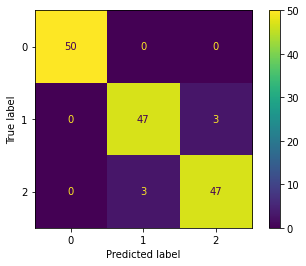

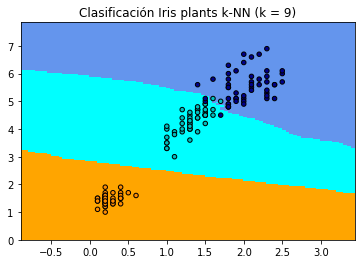


Para Random Forests:
Accuracy: 99.33333333333333%
Matriz de confusión:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


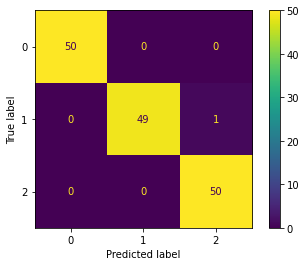

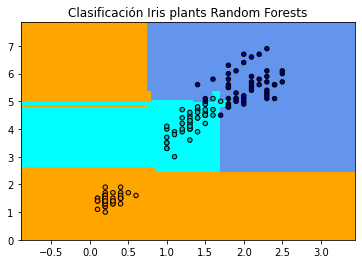

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

n_neighbors = 9

iris = datasets.load_iris()

# Se toman sólo dos atribtos
feat = [3,2]
X = iris.data[:, feat]
y = iris.target

h = .05

# Color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Se crea el clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
y_hat = clf.predict(X)
accuracy = accuracy_score(y, y_hat)
print('\nPara k-NN:')
print(f'Accuracy: {100*accuracy}%')
print('Matriz de confusión:')
plot_confusion_matrix(clf, X, y)
plt.show()

# Para graficar las fronteras de decisión----------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Graficando el resultado a color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficar también los puntos clasificados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificación Iris plants k-NN (k = %i)"
          % (n_neighbors))

plt.show()
# --------------------------------------------------------

# Se crea el clasificador
clf = ensemble.RandomForestClassifier()
clf.fit(X, y)
y_hat = clf.predict(X)
accuracy = accuracy_score(y, y_hat)
print('\nPara Random Forests:')
print(f'Accuracy: {100*accuracy}%')
print('Matriz de confusión:')
plot_confusion_matrix(clf, X, y)
plt.show()

# Para graficar las fronteras de decisión----------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Graficando el resultado a color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficar también los puntos clasificados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificación Iris plants Random Forests")

plt.show()
# --------------------------------------------------------

### Matriz de confusión
####Partiendo de que la matriz de confusión se ve como sigue:

<table>
  <tr>
    <td><center><b><font face="Courier New" size=4>   TP   </td>
    <td><center><font face="Courier New" size=4>   FP   </td>
  </tr>
  <tr>
    <td><center><font face="Courier New" size=4>   FN   </td>
    <td><center><b><font face="Courier New" size=4>   TN   </td>
  </tr>
</table>
</font>

####a continuación mostraremos métricas que se obtienen directamente de los valores de la matriz de confusión.



### Sensibilidad (Sensitivity)
####La sensibilidad, a menudo también referida como **recall**, se calcula como la razón:
<br><center>
>$\large \mathrm{Sensitivity}(y,\hat{y})=\frac{TP}{TP + FN}$
</center>

####Ésta puede verse como la habilidad del clasificador para evitar falsos negativos, es decir, qué tan bien clasifica la clase 1.

```
El mejor valor posible es 1, y 0 el peor.
```


### Especificidad (Specificity)
####La especificidad se calcula como la razón:
<br><center>
>$\large \mathrm{Specificity}(y,\hat{y})=\frac{TN}{TN + FP}$
</center>

####Ésta puede verse como la habilidad del clasificador para evitar falsos positivos, es decir, qué tan bien clasifica la clase 0.



### Balanced Accuracy
####Consiste en obtener el promedio entre sensibilidad y especificidad; cuando es un problema multiclase, entonces se obtiene el promedio de las sensiiblidades por cada clase:
<br><center>
```
Para dos clases:
```
>$\large \text{Balanced_Accuracy}(y,\hat{y})=\displaystyle\frac{1}{2}\left(\frac{TP}{P} + \frac{TN}{N}\right)$

```
Para el caso multiclase:
```
>$\large \text{Balanced_Accuracy}(y,\hat{y})=\displaystyle\frac{1}{n}\displaystyle\sum^n_{i=1}\frac{TP_i}{P_i}$
</center>

####donde $P = TP + FN$ y $N = TN + FP$

<br>


### Precisión (Precision)
La precisión se calcula como la razón:
<br><center>
>$\large \mathrm{Precision}(y,\hat{y})=\frac{TP}{TP + FP}$
</center>

Ésta puede verse como la habilidad del clasificador para NO etiquetar como *positiva (clase 1)* una observación que es *negativa (clase 0)*.

<br>


### F-measure o F1-score
El F1-score se obtiene al calcular la media **armónica** entre la precisión y la sensibilidad (también conocida como *recall*)
<br><center>
>$\Large \text{F1-Score}(y,\hat{y})=2*\frac{\text{precision} * \text{recall}}{\text{precision} + \text{recall}}$
</center>

<br>


### G-mean
####La G-mean se obtiene al calcular la media **geométrica** entre la sensibilidad y la especificidad.
<br><center>
>$\Large \text{G-mean}(y,\hat{y})=\sqrt[2]{\mathrm{sensitivity} * \mathrm{specificity}}$
</center>

```
Para el caso multiclase se obtienen utilizando el enfoque one vs the rest (ovr).
```

<br>


### AUC Score (Área bajo la curva ROC)
####La curva ROC ilustra el desempeño de un clasificador **binario** al graficar la fracción de verdaderos positivos del total de positivos (Sensibilidad) vs la fracción de falsos positivos del total de negativos (1 - Especificidad).
####Debajo se muestra un ejemplo de una curva ROC (naranja). La curva perfecta será la obtenida al graficar una recta vertical en el 0 del eje X y continuar como una recta horizontal en el 1.0 del eje Y; esto significaría que el clasificador clasificó correctamente todas las observaciones, y que el valor del área bajo la curva ROC (AUC) es **1**.

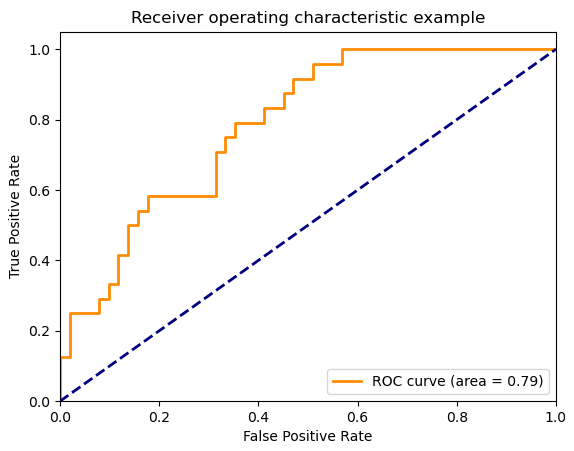

```
Para datasets con desbalanceo de clases, es común usar Balanced accuracy, G-mean y F1-score
```

####A continuación se muestra un ejemplo de clasificación donde se obtienen las métricas anteriormente descritas.

<br>


Para k-NN:
Matriz de confusión:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


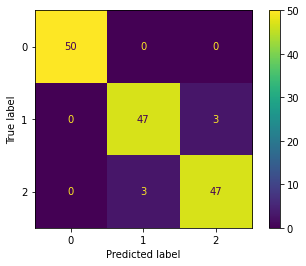

Accuracy: 96.0%
Sensibilidad: 0.96
Especificidad: 0.98
Balanced accuracy: 0.96
F1-score: 0.96
G-mean: 0.9595889443884958
AUC ROC: 0.9979999999999999


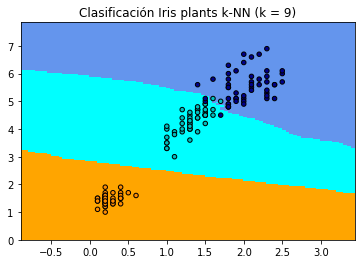


Para Random Forests:
Matriz de confusión:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


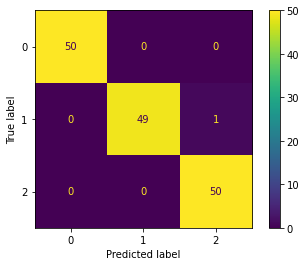

Accuracy: 99.33333333333333%
Sensibilidad: 0.9933333333333333
Especificidad: 0.9966666666666667
Balanced accuracy: 0.9933333333333333
F1-score: 0.9933326665999934
G-mean: 0.9932883883792687
AUC ROC: 0.9997333333333334


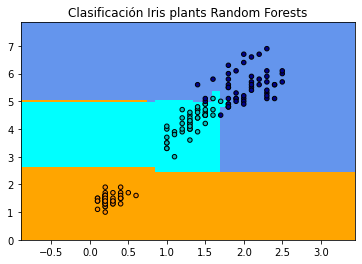

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, neighbors, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score, balanced_accuracy_score
from imblearn.metrics import sensitivity_score, specificity_score, geometric_mean_score

n_neighbors = 9

iris = datasets.load_iris()

# Se toman sólo dos atribtos
feat = [3,2]
X = iris.data[:, feat]
y = iris.target

h = .05

# Color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Se crea el clasificador
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)
y_hat = clf.predict(X)
y_prob = clf.predict_proba(X)
accuracy = accuracy_score(y, y_hat)
sensitivity = sensitivity_score(y, y_hat, average='macro')
specificity = specificity_score(y, y_hat, average='macro')
b_accuracy = balanced_accuracy_score(y, y_hat)
f1score = f1_score(y, y_hat, average='macro')
gmean = geometric_mean_score(y, y_hat)
auc = roc_auc_score(y, y_prob, multi_class='ovr')
print('\nPara k-NN:')
print('Matriz de confusión:')
plot_confusion_matrix(clf, X, y)
plt.show()
print(f'Accuracy: {100*accuracy}%')
print(f'Sensibilidad: {sensitivity}')
print(f'Especificidad: {specificity}')
print(f'Balanced accuracy: {b_accuracy}')
print(f'F1-score: {f1score}')
print(f'G-mean: {gmean}')
print(f'AUC ROC: {auc}')


# Para graficar las fronteras de decisión----------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Graficando el resultado a color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficar también los puntos clasificados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificación Iris plants k-NN (k = %i)"
          % (n_neighbors))

plt.show()
# --------------------------------------------------------

# Se crea el clasificador
clf = ensemble.RandomForestClassifier()
clf.fit(X, y)
y_hat = clf.predict(X)
y_prob = clf.predict_proba(X)
accuracy = accuracy_score(y, y_hat)
sensitivity = sensitivity_score(y, y_hat, average='macro')
specificity = specificity_score(y, y_hat, average='macro')
b_accuracy = balanced_accuracy_score(y, y_hat)
f1score = f1_score(y, y_hat, average='macro')
gmean = geometric_mean_score(y, y_hat)
auc = roc_auc_score(y, y_prob, multi_class='ovr')
print('\nPara Random Forests:')
print('Matriz de confusión:')
plot_confusion_matrix(clf, X, y)
plt.show()
print(f'Accuracy: {100*accuracy}%')
print(f'Sensibilidad: {sensitivity}')
print(f'Especificidad: {specificity}')
print(f'Balanced accuracy: {b_accuracy}')
print(f'F1-score: {f1score}')
print(f'G-mean: {gmean}')
print(f'AUC ROC: {auc}')

# Para graficar las fronteras de decisión----------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Graficando el resultado a color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficar también los puntos clasificados
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Clasificación Iris plants Random Forests")

plt.show()
# --------------------------------------------------------



---



---



Basado en:


*   https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
*   https://imbalanced-learn.org/stable/references/metrics.html
*   https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics



## Tarea 4

Aplicar el clasificador k-NN (k=1,3,5) a su dataset e incluir lo que sigue:
1. Incorporar un método de validación (diferente) para llevar a cabo la clasificación.
2. Además del k-NN, agregar dos clasificadores más, tomados de scikit-learn ([ver aquí](https://scikit-learn.org/stable/supervised_learning.html)).
3. Reportar las métricas de rendimiento vistas.